## 1. Acces to IPM Source from OpenAlea python
Access to notebook https://github.com/H2020-IPM-openalea/weatherdata/blob/refactoring/example/Weather_demonstration.ipynb

In [13]:
import pandas
pandas.set_option('display.max_rows',10)
pandas.set_option('display.max_colwidth',None)
import logging, sys
from weatherdata import WeatherDataHub
from weatherdata.getdata import datadir


## 1.1 Access to IPM Catalog and IPM list of weather parameters 

In [2]:
ws= WeatherDataHub()
ws.list_resources

,name,description,parameters
no.met.locationforecast,Met Norway Locationforecast,"9-day forecasts for the entire planet. 2.5 km resolution in the Nordic-Baltic region, 9km elsewhere","{'common': [1001, 3001, 2001, 4002], 'optional': None}"
ie.gov.data,Met Éireann Locationforecast,9-day forecasts for Ireland.,"{'common': [1001, 3001, 2001, 4002], 'optional': None}"
dk.dmi.pointweather,DMI Pointweather service,Seasonal weather data and forecasts for Denmark. Grid based,"{'common': [1002, 1112, 2001, 3002, 3101, 4002], 'optional': None}"
se.slu.lantmet,SLU Lantmet service,Seasonal weather data and forecasts for Sweden. Grid based,"{'common': [1002, 1003, 1004, 2001, 3002, 3003, 3004, 4003, 5001], 'optional': None}"
net.ipmdecisions.dwd.forecast.germany,Deutsche Wetterdienst location forecast by IPM Decisions,27 hour weather forecasts for Germany and surrounding areas. 2.5 km resolution. Pulls data from DWD's Open Data server (https://www.dwd.de/EN/ourservices/opendata/opendata.html). Made available by a custom adapter created by Met Norway and NIBIO.,"{'common': [1001, 3001, 2001, 4002], 'optional': None}"
...,...,...,...
no.nibio.lmt,Landbruksmeteorologisk tjeneste,Weather station network covering major agricultural areas of Norway. Data before 2010 are available by request. Email lmt@nibio.no,"{'common': [1002, 1003, 1004, 3002, 2001, 4003], 'optional': [3101, 5001]}"
com.meteobot,MeteoBot API,Network of privately owned weather stations. Access requires permission from each weather station's owner,"{'common': [1001, 3001, 2001, 4002], 'optional': None}"
info.fruitweb,Fruitweb,"Network of privately owned weather stations of several types; Davis, Metos and self manufactured. Access requires permission from each weather station's owner","{'common': [1001, 3001, 2001, 4002], 'optional': None}"
net.ipmdecisions.metos,Metos,"Network of privately owned weather stations of several types; Davis, Metos and self manufactured. Access requires permission from each weather station's owner","{'common': [1001, 3001, 2001, 4002], 'optional': None}"


In [3]:
ws.parameters

,id,name,description,unit,aggregationType
0,1001,Instantaneous temperature at 2m,None,Celcius,AVG
1,1002,Mean air temperature at 2m,None,Celcius,AVG
2,1003,Minimum air temperature at 2m,None,Celcius,MIN
3,1004,Maximum air temperature at 2m,None,Celcius,MAX
4,1021,Instantaneous temperature in canopy,None,Celcius,AVG
...,...,...,...,...,...
39,4012,Instantaneous wind speed at 10m,None,m/s,AVG
40,4013,Mean wind speed at 10m,None,m/s,AVG
41,4014,Max wind speed at 10m,None,m/s,MAX
42,4015,Min wind speed at 10m,None,m/s,MIN


## 1.2 Get a ressource, access to meta-information of this ressource 

### 1.2.1 get ressouce

In [5]:
fmi = ws.get_ressource(name='fi.fmi.observation.station')

### 1.2.2 Meta-informations of the ressource

### 1.2.2.1  List of parameters

In [6]:
fmi.parameter

,id,name,description,unit,aggregationType
1,1002,Mean air temperature at 2m,None,Celcius,AVG
21,2001,Precipitation,None,mm,SUM
23,3002,Mean RH at 2m,None,%,AVG
35,4003,Mean wind speed at 2m,None,m/s,AVG


### 1.2.2.2 list of stations 

In [7]:
fmi.stations

,name,id,latitude,longitude
101533,Alajärvi Möksy,101533,24.26,63.09
101185,Asikkala Pulkkilanharju,101185,25.52,61.27
102017,Enontekiö Kilpisjärvi Saana,102017,20.85,69.04
102016,Enontekiö Kilpisjärvi,102016,20.79,69.05
102019,Enontekiö Näkkälä,102019,23.58,68.6
...,...,...,...,...
101231,Virolahti Koivuniemi,101231,27.67,60.53
101310,Virrat Äijänneva,101310,23.54,62.33
101908,Ylitornio Meltosjärvi,101908,24.65,66.53
101690,Ylivieska airfield,101690,24.72,64.05


### 1.2 Get data and visualized
* get data according to weather parameters or several localisation

In [8]:
logging.disable(sys.maxsize)
exclude=[137188,101649,855522,137189,126737]
list_station=[int(id) for id in fmi.stations.id if not int(id) in exclude]


In [9]:
ds=fmi.data(parameters=[1002,3002],
            stationId=list_station,
            timeZone="Europe/Oslo",savecache=True,usecache=True)
ds

<xarray.Dataset>
Dimensions:   (time: 505, location: 203)
Coordinates:
  * time      (time) datetime64[ns] 2020-06-11T22:00:00 ... 2020-07-02T22:00:00
  * location  (location) int32 100683 100907 100908 ... 806428 852678 874863
    lat       (location) float64 60.3 60.13 59.78 59.96 ... 66.17 60.29 60.18
    lon       (location) float64 25.55 19.9 21.37 19.95 ... 29.14 24.57 24.79
Data variables:
    1002      (time, location) float64 15.3 9.4 13.6 12.8 ... 0.1 6.8 12.5 13.8
    3002      (time, location) float64 74.0 84.0 92.0 84.0 ... 85.0 99.0 96.0
Attributes:
    weatherRessource:  fi.fmi.observation.station
    timeStart:         2020-06-11T22:00:00.000000000
    timeEnd:           2020-07-02T22:00:00.000000000
    parameters:        ['1002', '3002']

* Visualization

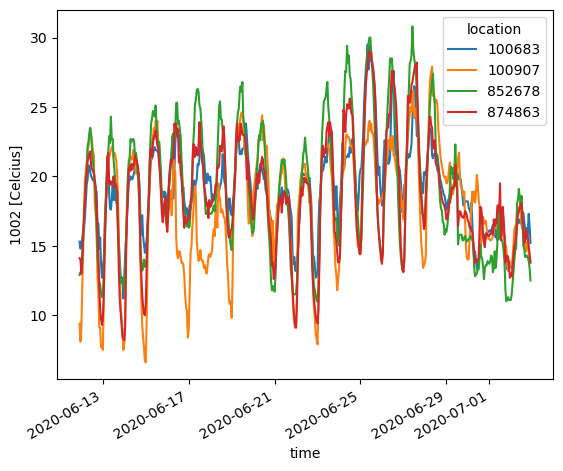

In [10]:
fmi.plot(ds,varname='1002',location=[100683,100907,852678,874863],resample=None)

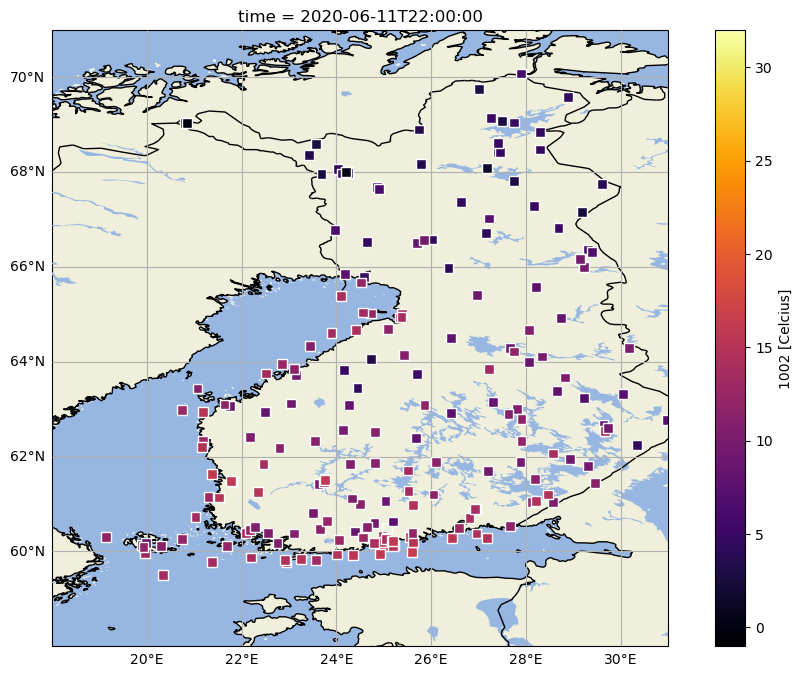

In [11]:
fmi.station_plot(ds=ds, varname="1002",time=0,resample=None)

## 2. Add local OpenAlea ressouce to local IPM catalog

* import local data

In [14]:
data=ws.__data_reader__(datadir + '/Boigneville_2012_2013_h.csv')
data

,temperature_air,relative_humidity,rain,wind_speed,global_radiation
2012-09-01 00:00:00,8.6,74.5,0.0,1.666667,0.0
2012-09-01 01:00:00,7.5,76.5,0.0,1.666667,0.0
2012-09-01 02:00:00,7.5,78.0,0.0,1.388889,0.0
2012-09-01 03:00:00,7.0,80.0,0.0,1.111111,0.0
2012-09-01 04:00:00,6.7,81.0,0.0,1.388889,0.0
...,...,...,...,...,...
2013-08-31 19:00:00,18.3,74.5,0.0,0.833333,0.0
2013-08-31 20:00:00,17.8,78.5,0.0,1.666667,0.0
2013-08-31 21:00:00,17.9,78.0,0.0,2.222222,0.0
2013-08-31 22:00:00,17.0,77.0,0.0,2.777778,0.0


* Add the local_ressources

In [15]:
ws.add_local_ressource(name="Mydata",
                       data=data,
                       latitude=3.876716,
                       longitude=43.610769,
                       altitude=0,
                       convert_name={"temperature_air":1001,
                                     "relative_humidity":3001,
                                     "rain":2001,
                                     "wind_speed":4005,
                                     "global_radiation":5001})

,1001,3001,2001,4005,5001
2012-09-01 00:00:00,8.6,74.5,0.0,1.666667,0.0
2012-09-01 01:00:00,7.5,76.5,0.0,1.666667,0.0
2012-09-01 02:00:00,7.5,78.0,0.0,1.388889,0.0
2012-09-01 03:00:00,7.0,80.0,0.0,1.111111,0.0
2012-09-01 04:00:00,6.7,81.0,0.0,1.388889,0.0
...,...,...,...,...,...
2013-08-31 19:00:00,18.3,74.5,0.0,0.833333,0.0
2013-08-31 20:00:00,17.8,78.5,0.0,1.666667,0.0
2013-08-31 21:00:00,17.9,78.0,0.0,2.222222,0.0
2013-08-31 22:00:00,17.0,77.0,0.0,2.777778,0.0


The ressources has been added at the local catalog to be used like any other ressources of the catalog

In [16]:
ws.list_resources

,name,description,parameters
no.met.locationforecast,Met Norway Locationforecast,"9-day forecasts for the entire planet. 2.5 km resolution in the Nordic-Baltic region, 9km elsewhere","{'common': [1001, 3001, 2001, 4002], 'optional': None}"
ie.gov.data,Met Éireann Locationforecast,9-day forecasts for Ireland.,"{'common': [1001, 3001, 2001, 4002], 'optional': None}"
dk.dmi.pointweather,DMI Pointweather service,Seasonal weather data and forecasts for Denmark. Grid based,"{'common': [1002, 1112, 2001, 3002, 3101, 4002], 'optional': None}"
se.slu.lantmet,SLU Lantmet service,Seasonal weather data and forecasts for Sweden. Grid based,"{'common': [1002, 1003, 1004, 2001, 3002, 3003, 3004, 4003, 5001], 'optional': None}"
net.ipmdecisions.dwd.forecast.germany,Deutsche Wetterdienst location forecast by IPM Decisions,27 hour weather forecasts for Germany and surrounding areas. 2.5 km resolution. Pulls data from DWD's Open Data server (https://www.dwd.de/EN/ourservices/opendata/opendata.html). Made available by a custom adapter created by Met Norway and NIBIO.,"{'common': [1001, 3001, 2001, 4002], 'optional': None}"
...,...,...,...
com.meteobot,MeteoBot API,Network of privately owned weather stations. Access requires permission from each weather station's owner,"{'common': [1001, 3001, 2001, 4002], 'optional': None}"
info.fruitweb,Fruitweb,"Network of privately owned weather stations of several types; Davis, Metos and self manufactured. Access requires permission from each weather station's owner","{'common': [1001, 3001, 2001, 4002], 'optional': None}"
net.ipmdecisions.metos,Metos,"Network of privately owned weather stations of several types; Davis, Metos and self manufactured. Access requires permission from each weather station's owner","{'common': [1001, 3001, 2001, 4002], 'optional': None}"
fr.meteo-concept.api,Meteodata by Météo Concept,"Weather station network covering all of mainland France, with a specially high density of agricultural stations in Brittany. Visit www.meteodata.fr and www.meteo-concept.fr or email us at contact@meteo-concept.fr","{'common': [1001, 2001, 3001, 4001, 4003], 'optional': [1003, 1004, 1021, 1101, 1131, 3003, 3004, 3101, 5001]}"


In [22]:
personal_data=ws.get_ressource(name="personal_data")
ds=personal_data.to_ipm(display="ds")
ds

,1001,3001,2001,4005,5001
2012-09-01 00:00:00,8.6,74.5,0.0,1.666667,0.0
2012-09-01 01:00:00,7.5,76.5,0.0,1.666667,0.0
2012-09-01 02:00:00,7.5,78.0,0.0,1.388889,0.0
2012-09-01 03:00:00,7.0,80.0,0.0,1.111111,0.0
2012-09-01 04:00:00,6.7,81.0,0.0,1.388889,0.0
...,...,...,...,...,...
2013-08-31 19:00:00,18.3,74.5,0.0,0.833333,0.0
2013-08-31 20:00:00,17.8,78.5,0.0,1.666667,0.0
2013-08-31 21:00:00,17.9,78.0,0.0,2.222222,0.0
2013-08-31 22:00:00,17.0,77.0,0.0,2.777778,0.0


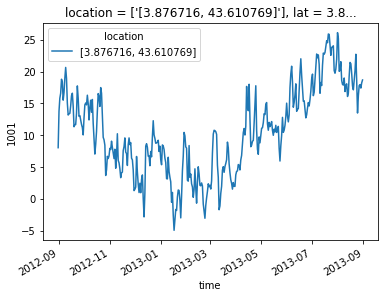

In [16]:
personal_data.plot(ds,varname="1001",resample="d")